## Optimizacion en Operación de DRILLING

**Oportunidad**

Mejorar el proceso de toma de decisiones mediante el uso de herramientas de datascience, con el fin de:


* Reducir/Eliminar el ILT (invisible lost time), que se estima en 15% del tiempo total de drilling.

* Optimizar ROP (rate of penetratrion).

* Identificar patrones/tendencias a fin de minimizar el NPT (non productive time),  planteando la operación de drilling como un todo (integrar datos del rig, formaciones, perfiles, antecedentes)




## Adquisición y Control de Datos

Para plantear la resolución de la oportunidad planteada, se utilizaron datos del repositorio público de datascience:

https://www.kaggle.com/datasets/musaabyazan/mu-1x-drilling-data 

Dicho dataset corresponde a los parámetros típicos de perforación registrados en el pozo MU-1X, con profundidades comprendidas entre los 1,290 ft a 4,927 ft.

Los parámetros registrados corresponden las lecturas de ROP, WOB, RPM, GR entre otras.

Una vez incorporado el set de datos, se procederá a su inspección y análisis estadístico a fin de depurar y controlar dicha información.

Este paso es de fundamental importancia para la correcta resolución del ejercicio.

In [222]:
import numpy as np, pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
path='C:\\Users\\Usuario\\Dataset\\MVP_O1'
os.chdir(path)
df=pd.read_csv('MU_1X_Drilling_Data.csv',index_col='Depth')

In [99]:
selected_columns = ['TG', 'ROP', 'MFI', 'MFOP', 'MDI', 'MDO', 'BDIA', 'WOB', 'HKLD', 'SPP','TRQ', 'RPM', 'MTO', 'MTI', 'GR']
df_shorter = df[selected_columns].dropna() # Selecciona todas las columnas disponibles

In [122]:
print(' Summary - Statistics\n')
lista=[df_shorter.TG,df_shorter.ROP,df_shorter.MFI,df_shorter.MFOP,df_shorter.MDI,df_shorter.MDO,df_shorter.BDIA,
df_shorter.WOB,df_shorter.HKLD,df_shorter.SPP,df_shorter.TRQ,df_shorter.RPM,df_shorter.MTO,df_shorter.MTI,df_shorter.GR]

tabla=pd.DataFrame(index=['Size','Min','Max','Mean','Std','Skew','Kurtosis','Percentile10','Percentile90'])
j=0
for i in list(['TG', 'ROP', 'MFI', 'MFOP', 'MDI', 'MDO', 'BDIA', 'WOB', 'HKLD', 'SPP','TRQ', 'RPM', 'MTO', 'MTI', 'GR']):
    data=lista[j]
    tabla[i]=[stats.describe(lista[j])[0],stats.describe(lista[j])[1][0],stats.describe(lista[j])[1][1],stats.describe(lista[j])[2],
    np.sqrt(stats.describe(lista[j])[3]),stats.describe(lista[j])[4],stats.describe(lista[j])[5],np.percentile(lista[j],10),np.percentile(lista[j],90)]
    j+=1

tabla.style.format('{:20,.3f}')

 Summary - Statistics



,TG,ROP,MFI,MFOP,MDI,MDO,BDIA,WOB,HKLD,SPP,TRQ,RPM,MTO,MTI,GR
Size,"14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000","14,549.000"
Min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.100,-213.000,4.300
Max,"44,705.000",109.300,"4,647.000",100.000,2.161,1.665,26.000,40.100,341.300,223.620,47.420,163.000,29.900,30.300,164.750
Mean,"1,526.899",15.500,"2,789.840",28.562,1.277,1.276,14.002,5.566,285.589,161.570,11.047,126.669,18.285,21.527,52.545
Std,"1,948.504",5.778,838.150,15.424,0.491,0.472,5.162,3.058,30.542,37.801,4.772,30.393,7.413,3.255,30.796
Skew,2.442,2.224,-0.791,-0.426,-1.879,-1.801,1.154,1.141,-1.524,-0.485,0.865,-1.311,-1.984,-25.211,-0.066
Kurtosis,21.201,16.516,-0.519,-0.568,2.377,2.135,0.687,3.484,6.659,0.314,0.634,1.682,2.092,"1,852.565",-0.419
Percentile10,0.000,9.800,"1,321.000",0.000,0.000,0.064,8.500,2.200,232.500,110.352,6.260,99.000,0.100,19.000,8.900
Percentile90,"4,133.200",22.400,"3,774.000",45.000,1.649,1.639,26.000,9.600,316.700,213.160,16.690,151.000,22.400,26.800,79.100


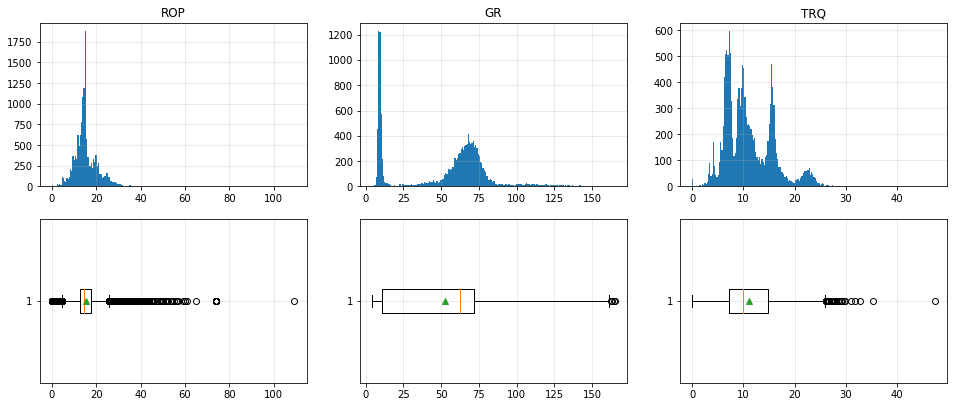

In [189]:
# PLOT PANEL EJEMPLO

fig,ax =plt.subplots(figsize=(14,5),nrows=2,ncols=3)
fig.subplots_adjust(hspace=0.2,left=0.05, right=0.95, bottom=0.05, top=1.05)

ax[0][0].title.set_text('ROP')
ax[0][0].hist(df_shorter.ROP,bins=200)
ax[1][0].boxplot(df_shorter.ROP,vert=False,showmeans=True,showfliers=True)
ax[0][0].grid('True',alpha=0.3)
ax[1][0].grid('True',alpha=0.3)

ax[0][1].title.set_text('GR')
ax[0][1].hist(df_shorter.GR,bins=200)
ax[1][1].boxplot(df_shorter.GR,vert=False,showmeans=True,showfliers=True)
ax[0][1].grid('True',alpha=0.3)
ax[1][1].grid('True',alpha=0.3)

ax[0][2].title.set_text('TRQ')
ax[0][2].hist(df_shorter.TRQ,bins=200)
ax[1][2].boxplot(df_shorter.TRQ,vert=False,showmeans=True,showfliers=True)
ax[0][2].grid('True',alpha=0.3)
ax[1][2].grid('True',alpha=0.3)

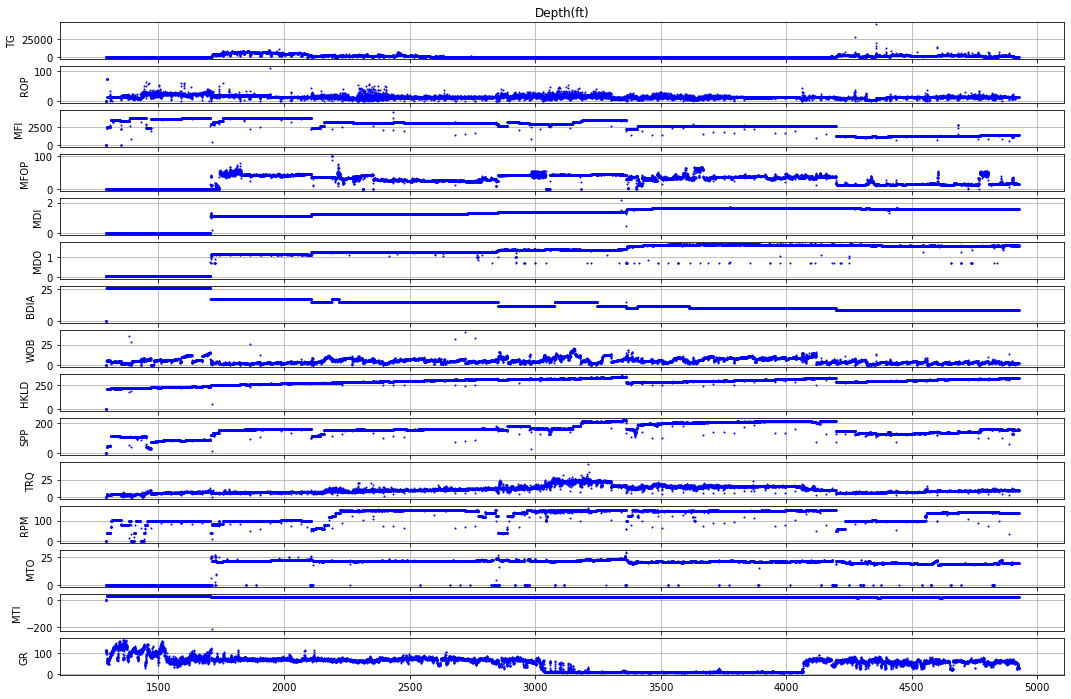

In [110]:
fig,ax=plt.subplots(figsize=(18,12),ncols=1,nrows=len(selected_columns))
for i in range(len(selected_columns)):
    ax[i].plot(df_shorter[selected_columns[i]],color='blue',ls=' ',marker='.',ms=2)
    ax[i].set_ylabel(df_shorter[selected_columns[i]].name)
    ax[0].set_title("Depth(ft)")
    ax[i].grid()

## Exploración de Datos

En este apartado nos proponemos inspeccionar los datos disponibles, entender de qué manera están representados, cómo se distribuyen y de qué manera se relacionan.

Además con la ayuda del heatmap de correlaciones comenzaremos a entender mejor de qué manera las distintas variables del procesos se relacionan entre sí, con el objetivo de las posibles conexiones que existentes entre las mismas.

Como colorario planteamos el grado de correlación que existe entre todas las variables respecto al ROP, con algunos puntos a remarcar:

* GR (gamma ray) exhibe un grado de correlación menor, positivo, que insinúa la relevancia de la formación perforada.

* HKLD (hook load) evidencia un grado de correlación negativa, indicando a mayor ROP, mempor carga en el hook.

* TRQ (torque) expresa un grado de correlación inexsitente con ROP.

También es interesante remarcar que algunas consideraciones observadas en el dendograma del heat map:

* WOB (weight on bit) y ROP se presentan en extremos opuestos.

* SPP (spontaneous potential), TG (total gas) y GR se agrupan en un mismo cluster, manifestando el mismo orígen entre ellos (variables de formación)

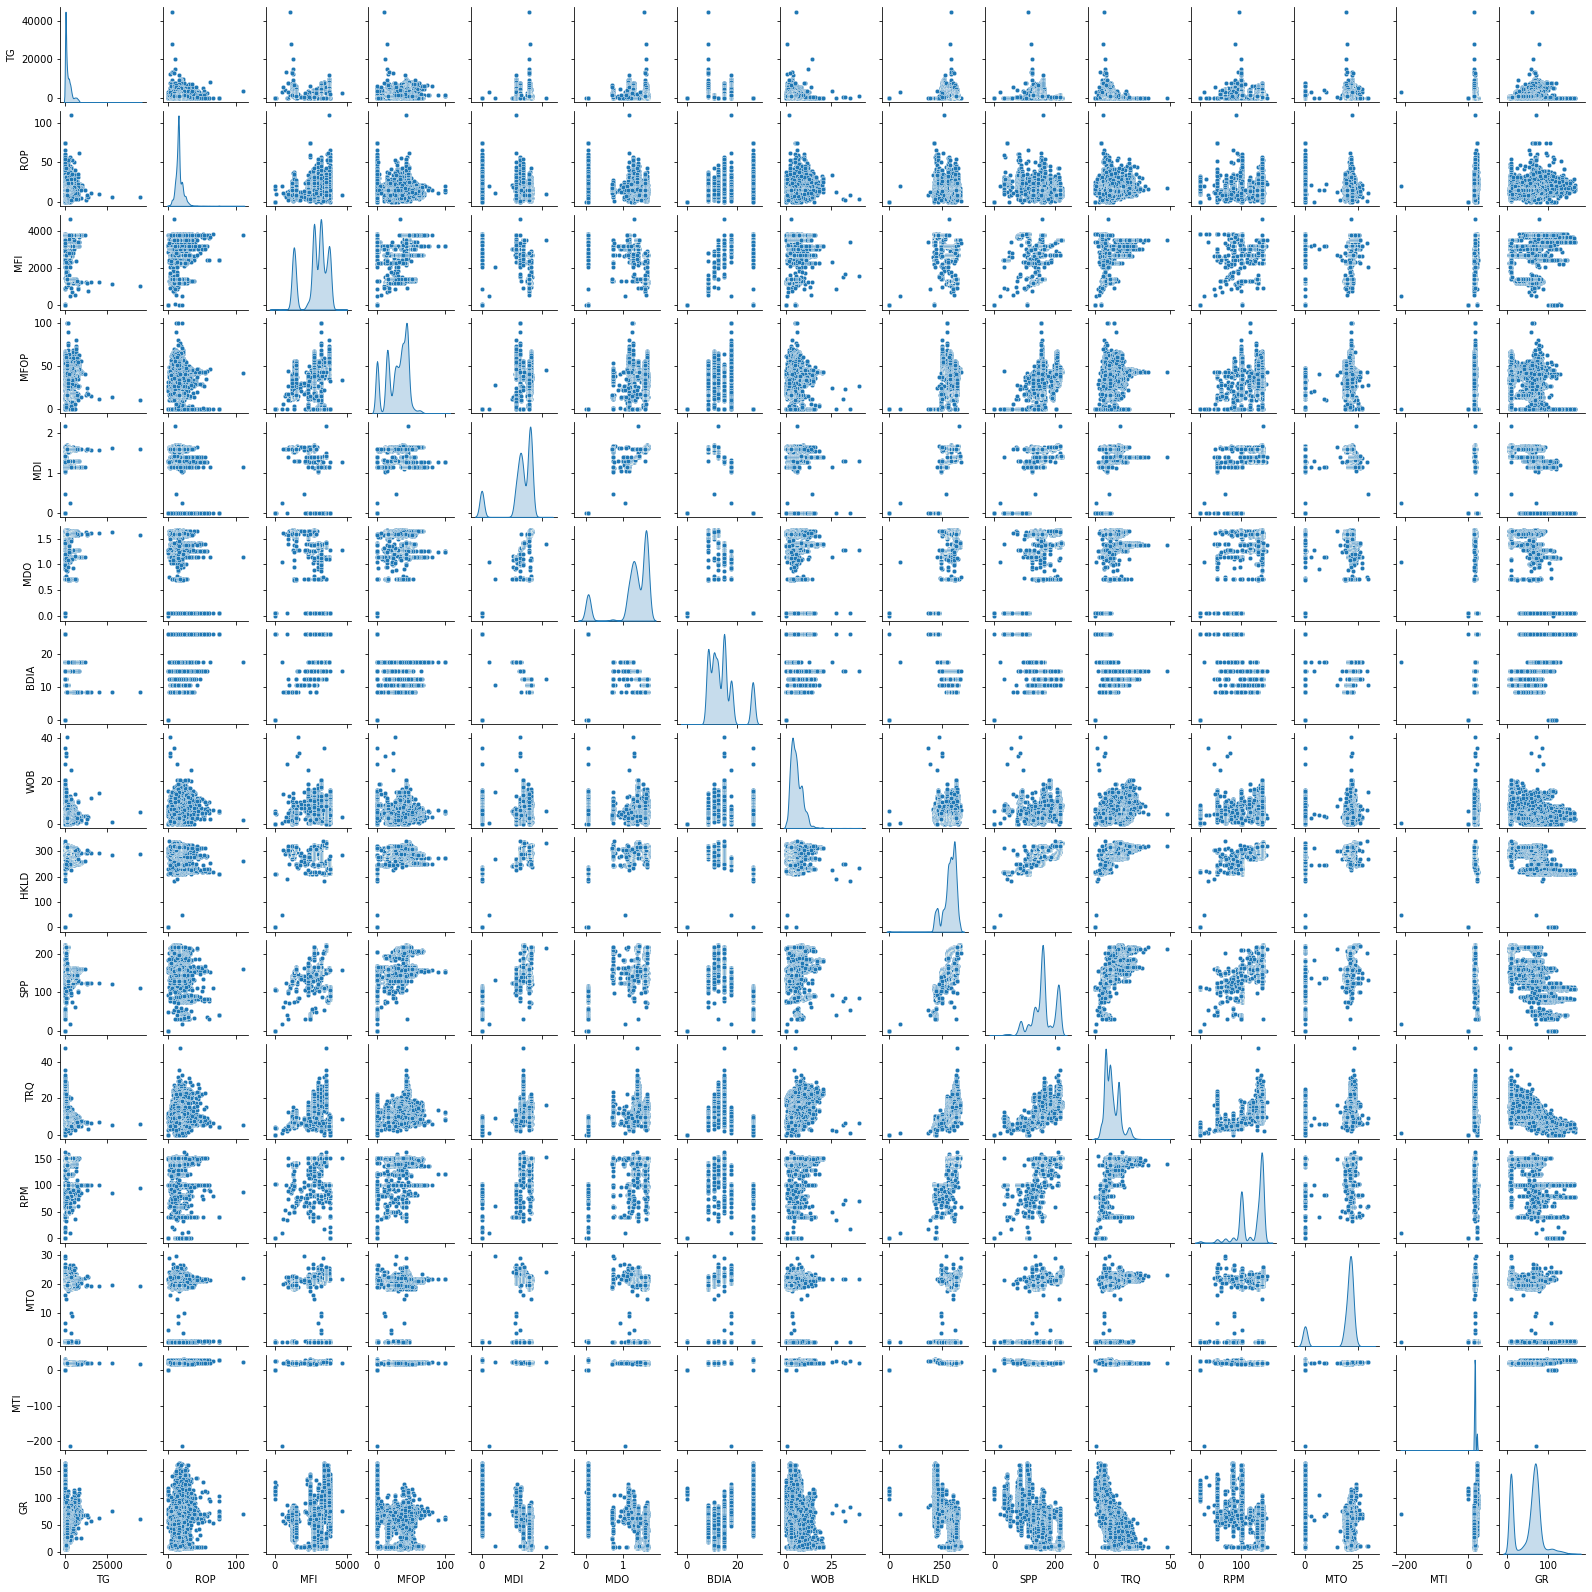

In [113]:
sns.pairplot(df_shorter,diag_kind='kde',plot_kws={'s':20},height=1.5)

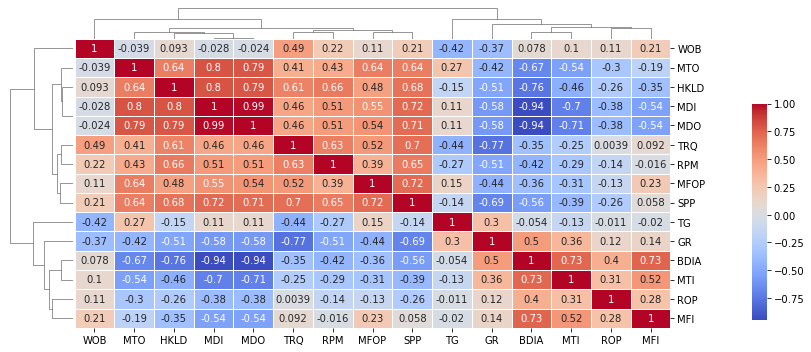

In [112]:
sns.clustermap(df_shorter.corr(),cmap='coolwarm',dendrogram_ratio=(.1,.1),cbar_pos=(1.05,.1,.02,.6),linewidths=1,figsize=(10,5),annot=True)

Text(0.5, 1.0, 'Indice de Correlación')

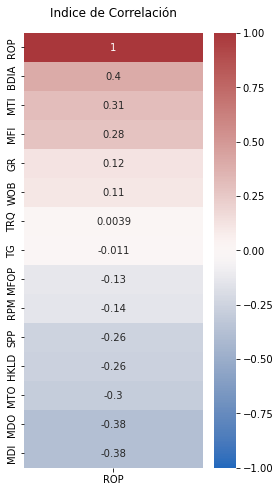

In [191]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df_shorter.corr()[['ROP']].sort_values(by='ROP', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Indice de Correlación', fontdict={'fontsize':12}, pad=16)

## Modelización

En esta etapa se focalizará principalmente en la aplicación de *algoritmos de clustering no supervisados* , de manera de identificar posibles patterns ocultos que al momento del análisis han permanecido desapercibidos.

La utilización de *algoritmos supervisados* para la optimización de los parámetros de perforación orientados a maximizar ROP no se implementará, ya que numerosos papers (citados al principio del notebook) los explican de manera exhaustiva.



In [220]:
# ROP versus GR

#filtro_ROP=df_shorter[(df_shorter['ROP']<22.4) & (df_shorter['ROP']>9.8)] # Percentiles
filtro_ROP=df_shorter[(df_shorter['ROP']<50) & (df_shorter['ROP']>1)] # Arbitrario

#filtro_GR=df_shorter[(df_shorter['GR']<79.1) & (df_shorter['GR']>8.9)] # Percentiles
filtro_GR=df_shorter[(df_shorter['GR']<100) & (df_shorter['GR']>5)] # Arbitrario

filtro=filtro_ROP.merge(filtro_GR,how='inner')

df_total=filtro

#df_total['HKLD'].quantile(0.33)
#df_total['HKLD'].quantile(0.66)
#from statistics import *
#quantiles(df_total['HKLD'],n=3,method='inclusive')
df_total['Status']=pd.cut(df_total.HKLD,[0,281.7,304.9,np.inf],labels=['low HKLD','medium HKLD','high HKLD'])

data_y=df_total['ROP']
label_y='ROP'
data_x=df_total['GR']
label_x='GR'

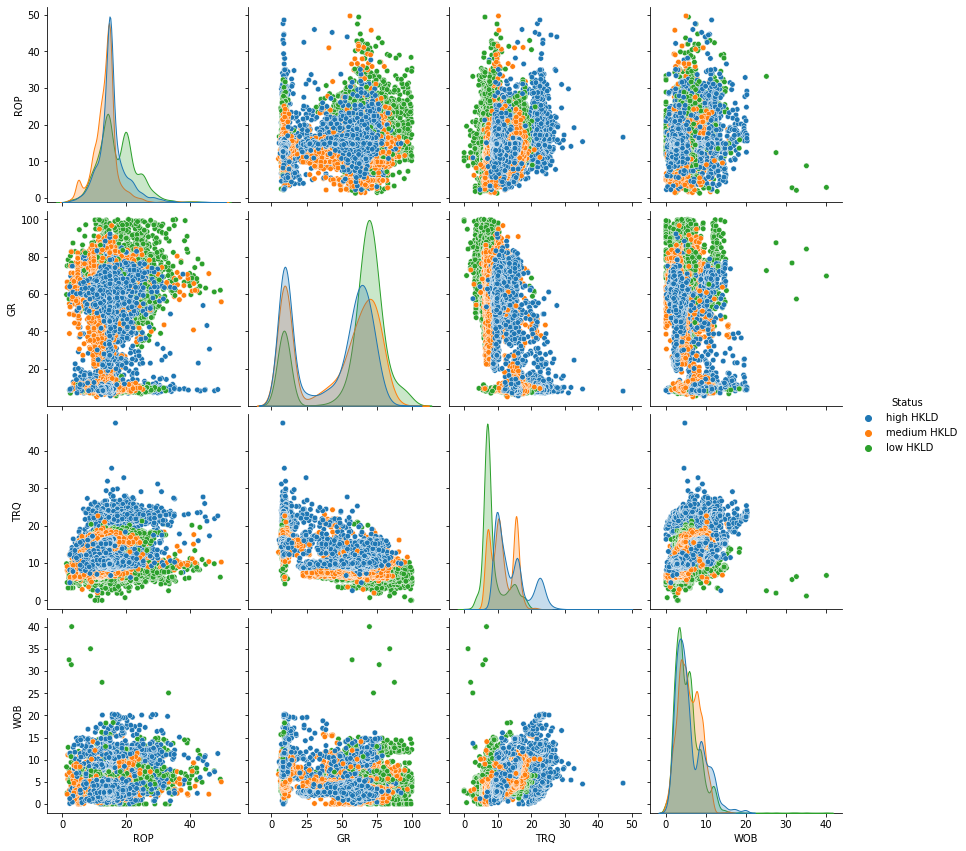

In [221]:
sns.pairplot(df_total,vars=['ROP','GR','TRQ','WOB'],diag_kind='kde',hue='Status',hue_order = ['high HKLD','medium HKLD','low HKLD'],height=3,plot_kws={'s':30})

<AxesSubplot:xlabel='TRQ', ylabel='GR'>

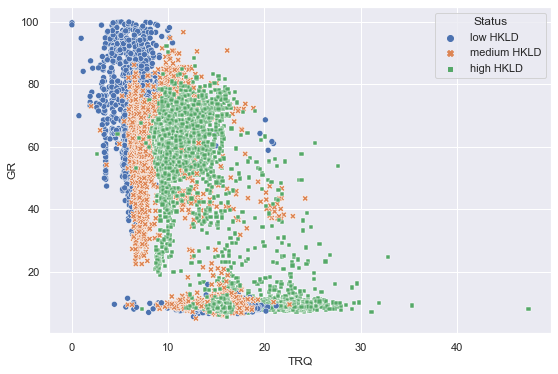

In [228]:
sns.set(rc={'figure.figsize':(9,6)})
sns.scatterplot(data=df_total, x='TRQ', y='GR', hue='Status',style='Status')

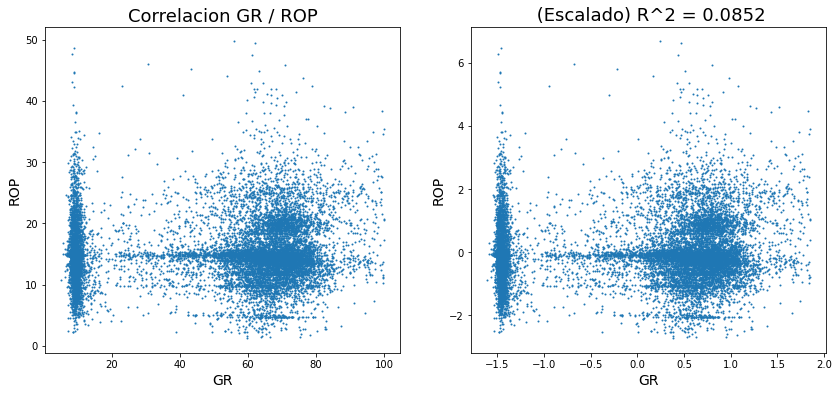

In [194]:
arr = pd.concat([data_x,data_y],axis=1).dropna().to_numpy()
arr_esc = StandardScaler().fit_transform(arr)

fig, ax = plt.subplots(figsize=(14,6), ncols=2)
r2 = data_x.corr(data_y).round(4)

titulo = 'Correlacion ' + data_x.name + ' / ' + data_y.name
ax[0].scatter(arr[:,0],arr[:,1], s=1) #scatter(x,y, s=1)
ax[0].set_title(titulo, fontsize=18)
ax[0].set_xlabel(data_x.name, fontsize=14)
ax[0].set_ylabel(data_y.name, fontsize=14)

titulo  = ' (Escalado) R^2 = ' + str(r2)
ax[1].scatter(arr_esc[:,0],arr_esc[:,1], s=1)
ax[1].set_title(titulo, fontsize=18)
ax[1].set_xlabel(data_x.name, fontsize=14)
ax[1].set_ylabel(data_y.name, fontsize=14)

plt.show()

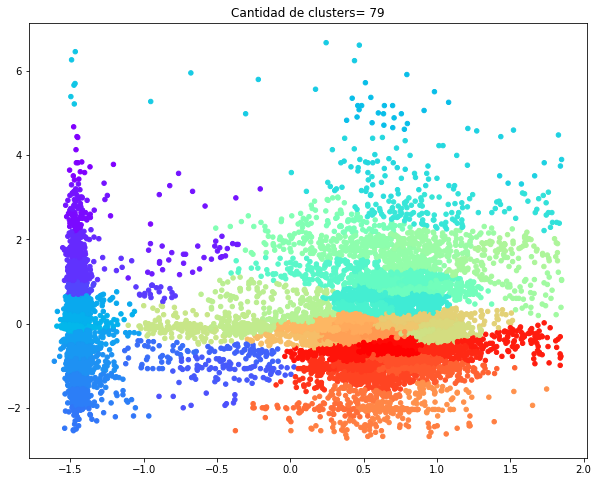

In [195]:
agrupados = linkage(arr_esc, 'ward', metric='euclidean') # single - complete - average - centroid - ward 
clusters = fcluster(agrupados, t=3, criterion='distance')
fig, ax = plt.subplots(figsize=(10,8), nrows=1)
ax.scatter(arr_esc[:,0],arr_esc[:,1], s=20, c=clusters,cmap='rainbow')
ax.set_title('Cantidad de clusters= '+ np.array2string(clusters.max()), fontsize=12)
plt.show()

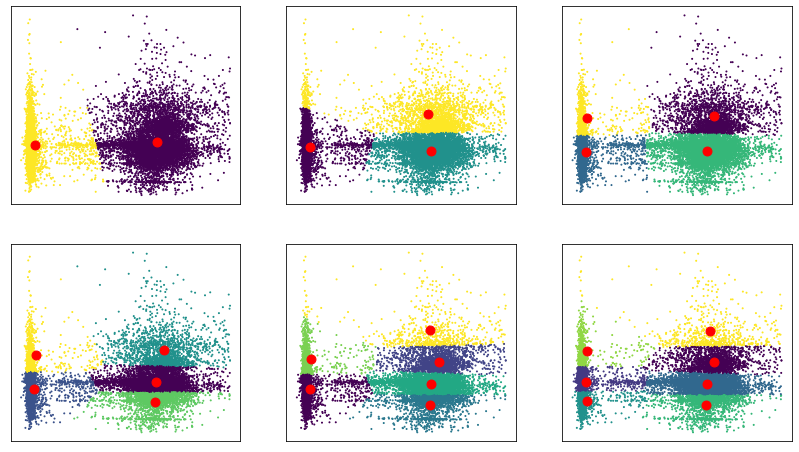

In [196]:
filas = 2
columnas = 3
fig, ax = plt.subplots(figsize=(14,8), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(arr_esc)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(arr_esc[:,0], arr_esc[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    #ax[row][col].text(s = 'n='+str(i+2), fontsize=20, y=0, x=6)

plt.show()

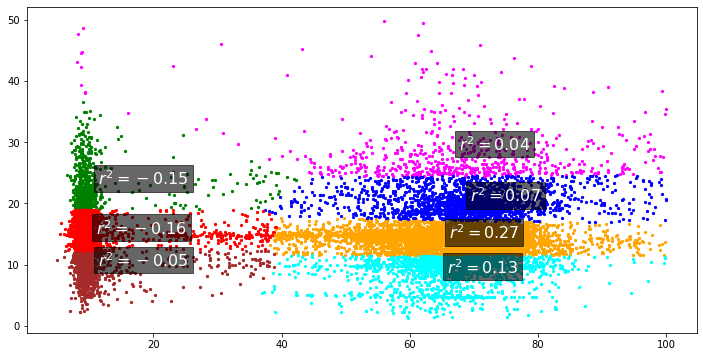

In [198]:
n=7
#r2 = data_x.corr(data_y).round(4)
arr = pd.concat([data_x,data_y],axis=1).dropna()
arr_esc = StandardScaler().fit_transform(arr)
arr=arr.reset_index()
arr.rename(columns={'index':'Depth'},inplace=True)

modelo = KMeans(n_clusters = n).fit(arr_esc)
y_means = modelo.fit_predict(arr_esc)
centroides = modelo.cluster_centers_ 

clustersList = list(y_means)
for i in range(len(arr)):
    arr.loc[i,'cluster'] = clustersList.pop()

colores= ["orange","green","brown","cyan","magenta","blue","red","yellow","lightgreen","pink"]  
plt.figure(figsize=(12,6))

for c in range(n):
        
    df_total = arr.loc[arr.cluster == c]
    co = round(df_total[label_x].corr(df_total[label_y]),2)

    plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
            
    coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
    t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
    t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))


In [201]:
# ROP versus TRQ
#filtro_ROP=df_shorter[(df_shorter['ROP']<22.4) & (df_shorter['ROP']>9.8)] # Percentiles
filtro_ROP=df_shorter[(df_shorter['ROP']<50) & (df_shorter['ROP']>1)] # Arbitrario
#filtro_TRQ=df_shorter[(df_shorter['TRQ']<16.6) & (df_shorter['TRQ']>6.2)] # Percentiles
filtro_TRQ=df_shorter[(df_shorter['TRQ']<20) & (df_shorter['TRQ']>5)] # Arbitrario
filtro=filtro_ROP.merge(filtro_TRQ,how='inner')
df_total=filtro
data_y=df_total['ROP']
label_y='ROP'
data_x=df_total['TRQ']
label_x='TRQ'

# ROP versus RPM
#filtro_ROP=df_shorter[(df_shorter['ROP']<22.4) & (df_shorter['ROP']>9.8)]
#filtro_RPM=df_shorter[(df_shorter['RPM']<151) & (df_shorter['RPM']>99)]
#filtro=filtro_ROP.merge(filtro_RPM,how='inner')
#df_total=filtro
#data_y=df_total['ROP']
#label_y='ROP'
#data_x=df_total['RPM']
#label_x='RPM'

# ROP versus WOB
#filtro_ROP=df_shorter[(df_shorter['ROP']<22.4) & (df_shorter['ROP']>9.8)]
#filtro_WOB=df_shorter[(df_shorter['WOB']<9.6) & (df_shorter['WOB']>2.2)]
#filtro=filtro_WOB.merge(filtro_RPM,how='inner')
#df_total=filtro
#data_y=df_total['ROP']
#label_y='ROP'
#data_x=df_total['WOB']
#label_x='WOB'

# ROP versus SPP
#filtro_ROP=df_shorter[(df_shorter['ROP']<22.4) & (df_shorter['ROP']>9.8)]
#filtro_SPP=df_shorter[(df_shorter['SPP']<213) & (df_shorter['SPP']>110)]
#filtro=filtro_ROP.merge(filtro_SPP,how='inner')
#df_total=filtro
#data_y=df_total['ROP']
#label_y='ROP'
#data_x=df_total['SPP']
#label_x='SPP'

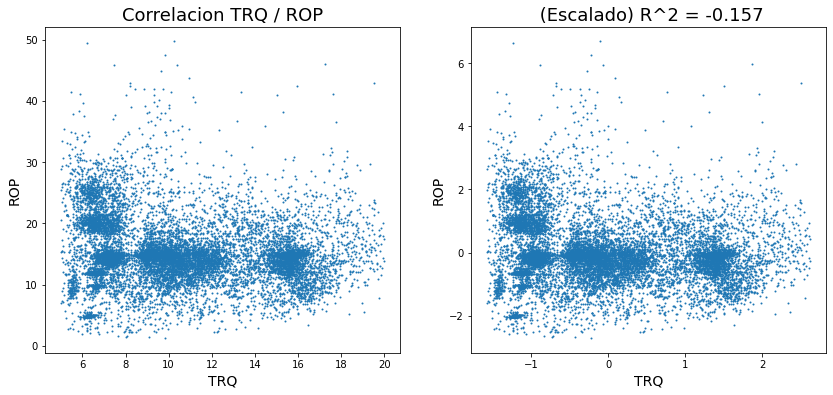

In [202]:
arr = pd.concat([data_x,data_y],axis=1).dropna().to_numpy()
arr_esc = StandardScaler().fit_transform(arr)

fig, ax = plt.subplots(figsize=(14,6), ncols=2)
r2 = data_x.corr(data_y).round(4)

titulo = 'Correlacion ' + data_x.name + ' / ' + data_y.name
ax[0].scatter(arr[:,0],arr[:,1], s=1) #scatter(x,y, s=1)
ax[0].set_title(titulo, fontsize=18)
ax[0].set_xlabel(data_x.name, fontsize=14)
ax[0].set_ylabel(data_y.name, fontsize=14)

titulo  = ' (Escalado) R^2 = ' + str(r2)
ax[1].scatter(arr_esc[:,0],arr_esc[:,1], s=1)
ax[1].set_title(titulo, fontsize=18)
ax[1].set_xlabel(data_x.name, fontsize=14)
ax[1].set_ylabel(data_y.name, fontsize=14)

plt.show()

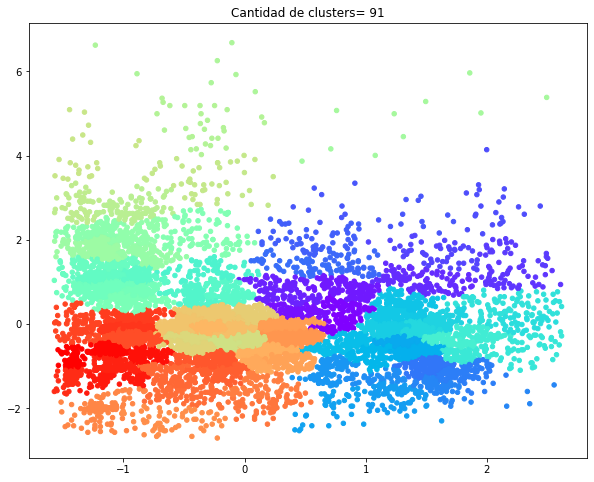

In [203]:
agrupados = linkage(arr_esc, 'ward', metric='euclidean') # single - complete - average - centroid - ward 
clusters = fcluster(agrupados, t=3, criterion='distance')
fig, ax = plt.subplots(figsize=(10,8), nrows=1)
ax.scatter(arr_esc[:,0],arr_esc[:,1], s=20, c=clusters,cmap='rainbow')
ax.set_title('Cantidad de clusters= '+ np.array2string(clusters.max()), fontsize=12)
plt.show()

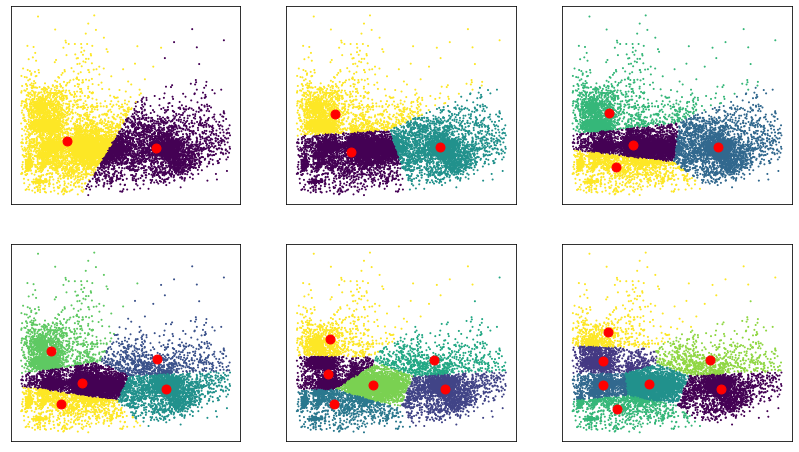

In [204]:
filas = 2
columnas = 3
fig, ax = plt.subplots(figsize=(14,8), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(arr_esc)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(arr_esc[:,0], arr_esc[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    #ax[row][col].text(s = 'n='+str(i+2), fontsize=20, y=0, x=6)

plt.show()

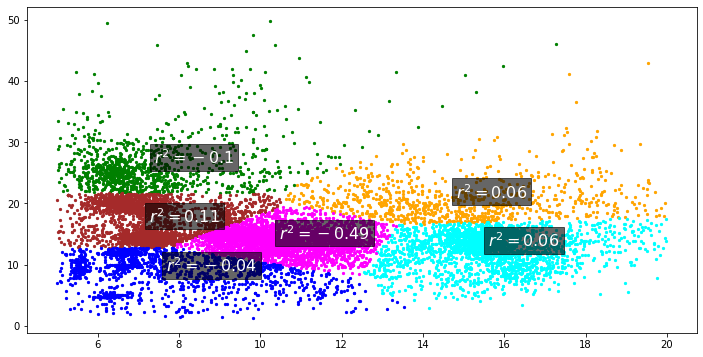

In [205]:
n=6
#r2 = data_x.corr(data_y).round(4)
arr = pd.concat([data_x,data_y],axis=1).dropna()
arr_esc = StandardScaler().fit_transform(arr)
arr=arr.reset_index()
arr.rename(columns={'index':'Depth'},inplace=True)

modelo = KMeans(n_clusters = n).fit(arr_esc)
y_means = modelo.fit_predict(arr_esc)
centroides = modelo.cluster_centers_ 

clustersList = list(y_means)
for i in range(len(arr)):
    arr.loc[i,'cluster'] = clustersList.pop()

colores= ["orange","green","brown","cyan","magenta","blue","red","yellow","lightgreen","pink"]  
plt.figure(figsize=(12,6))

for c in range(n):
        
    df_total = arr.loc[arr.cluster == c]
    co = round(df_total[label_x].corr(df_total[label_y]),2)

    plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
            
    coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
    t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
    t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))


## Conclusiones

Si etiquetamos los datos según la carga en el gancho (HKLD), segmentados en tres intervalos, alta, media y baja carga, se observan algunas curiosidades:

* los mayores ROP se corresponden a cargas bajas en el gancho.

* la distribución del GR es bimodal, indicando dos grandes grupos de formaciones, siendo la de mayor valor la que menor resistencia presenta frente a HKLD.

* mayores valores de TRQ se corresponden a mayores valores de HKLD.

La correlación existente entre GR / ROP es mínima (0.08) indicando que la tasa de penetración es transparente a la presencia de distintas formaciones, asumiendo que el GR es un indicativo de esta.

No obstante, si agrupamos en 7 clusters, podemos calcular nuevamente el índice de correlación, revelando dos grupos bien diferenciados (los de correlación positiva y los de correlación negativa) que están asociadas a las dos formaciones presentadas en el GR; además, el cluster 2 es el de mayor correlación, resultando ser:

* Cluster 0 – índice de correlación +0.04
* Cluster 1 – índice de correlación +0.07
* Cluster 2 – índice de correlación +0.27
* Cluster 3 – índice de correlación +0.13
* Cluster 4 – índice de correlación -0.15
* Cluster 5 – índice de correlación -0.16.
* Cluster 6 – índice de correlación -0.05

El análisis de correlación TRQ / ROP calcula un índice de -0.15, exhibiendo una zona de máxima en valor -0.49.

Esta región es de máxima atención ya que la disminución del ROP se traduce en un incremento del torque TRQ, evento a considerar como posible zona de entrampamiento.

***
### ANEXO

*Antecedentes*

* SPE 175748 (2015): improve ROP and identify ILT 

* SPE 181382 (2016): improve ROP

* jngse.2017.02.019 (2017): improve ROP

* petrol.2017.06.039 (2017): improve ROP

* SAS: improve ROP 

* Sridharan-Suresh Kumar (2020): improve ROP

* Drilling stuck pipe classifcation and mitigation in the Gulf of Suez oil felds using artifcial intelligence (2020)

* Machine learning algorithm for prediction of stuck pipe incidents using statistical data (2021)

* Use of Machine Learning and Data Analytics to Detect Downhole Abnormalities While Drilling Horizontal Wells (2021)

*Utilities*

In [169]:
# Si quiero acceder a un cluster en particular seteo el valor de c
#c=2

#df_total = arr.loc[arr.cluster == c]
#co = round(df_total[label_x].corr(df_total[label_y]),2)

#plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
        
#coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
#t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
#t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))

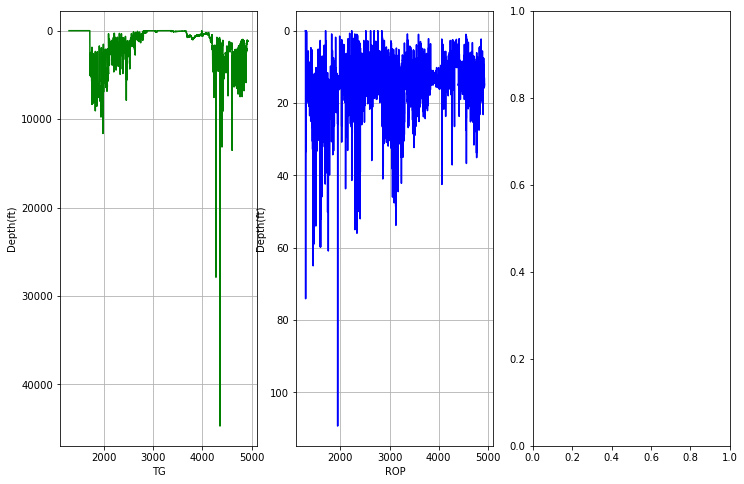

In [75]:
df_normal = df_clean.copy()
#for column in df_clean.describe().columns:
#    df_normal = df_clean[(df_clean[column]>df_clean.describe([column]['min'])&(df_clean[column]<= df_clean.describe()[column]['max']))]
def plotter():
 f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
 logs=selected_columns = ['TG','ROP','WOB']
 #logs = ['GR','SP']
 colors = ['green','blue']
 for i,log,color in zip(range(2),logs,colors):
   ax[i].plot(df_normal[log],color=color)
   ax[i].invert_yaxis()
   ax[i].set_xlabel(log)
   ax[i].set_ylabel("Depth(ft)")
   ax[i].grid()
plotter()